# Introduction to Regression with Neural Networks in TensorFlow

There are many definations for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter...predicting a number.

In [4]:
# Import TensorFlow
import tensorflow as tf

## Creating a data to view and fit

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x =  np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create lables
y = np.array([3 , 6, 9, 12, 15, 18, 21, 24], dtype = np.float16)

In [6]:
x,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float16))

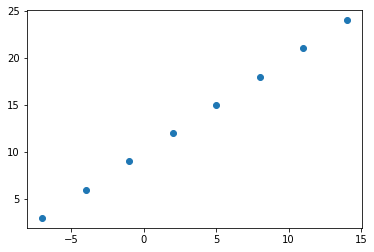

In [7]:
# Create a Scatter plot
plt.scatter(x,y)

In [8]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes 

In [9]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [10]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape,  output_shape

((), ())

In [11]:
# Turn Our NumPy arrays as tensor with dtype float32
x = tf.cast(tf.constant(x), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [12]:
x.shape, y.shape


(TensorShape([8]), TensorShape([8]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function( in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between x and y (features and labels)

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) #with 1 neuron
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, # mean absoloute error
              optimizer = tf.keras.optimizers.SGD(), # sgd = stochasti c gradient descent
              metrics = ['mae'])
# 3. fit the model 
model.fit(x, y, epochs=5 ) #epochs = 5 mean you have 5 opportunity to go through all of x and y

Epoch 1/5
1/1 [==============================] - 0s 998us/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 984us/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 0s/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 998us/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 998us/step - loss: 10.9748 - mae: 10.9748


In [14]:
# Check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

### Improving the Model

we can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the numbr of hidden units(all called neurons) within each of the hidden layers, change the activation function of the layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here wr might fit a model for more epochs(leave it training for longer) or on more data(give the model more examples to learn from).

In [16]:
# Let's rebuid the model 

# 1. Create the model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics =["mae"]
             )
# 3. Fit the model 
model.fit(x,y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 988us/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 989us/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 999us/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 998us/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 984us/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 998us/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 988us/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 998us/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 2ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [=======================

1/1 [==============================] - 0s 997us/step - loss: 6.9600 - mae: 6.9600
Epoch 88/100
1/1 [==============================] - 0s 997us/step - loss: 6.9544 - mae: 6.9544
Epoch 89/100
1/1 [==============================] - 0s 889us/step - loss: 6.9488 - mae: 6.9488
Epoch 90/100
1/1 [==============================] - 0s 0s/step - loss: 6.9431 - mae: 6.9431
Epoch 91/100
1/1 [==============================] - 0s 997us/step - loss: 6.9375 - mae: 6.9375
Epoch 92/100
1/1 [==============================] - 0s 1ms/step - loss: 6.9319 - mae: 6.9319
Epoch 93/100
1/1 [==============================] - 0s 999us/step - loss: 6.9263 - mae: 6.9263
Epoch 94/100
1/1 [==============================] - 0s 999us/step - loss: 6.9206 - mae: 6.9206
Epoch 95/100
1/1 [==============================] - 0s 998us/step - loss: 6.9150 - mae: 6.9150
Epoch 96/100
1/1 [==============================] - 0s 998us/step - loss: 6.9094 - mae: 6.9094
Epoch 97/100
1/1 [==============================] - 0s 0s/step - los

In [17]:
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [18]:
model.predict([17])

array([[29.739855]], dtype=float32)

In [19]:
# 1. Create a model with 1 hidden layer

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, activation ="relu"))
model.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# 3. Fit the model

model.fit(x,y , epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 998us/step - loss: 11.7804 - mae: 11.7804
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 11.2324 - mae: 11.2324
Epoch 4/100
1/1 [==============================] - 0s 998us/step - loss: 10.6601 - mae: 10.6601
Epoch 5/100
1/1 [==============================] - 0s 561us/step - loss: 10.0632 - mae: 10.0632
Epoch 6/100
1/1 [==============================] - 0s 999us/step - loss: 9.4503 - mae: 9.4503
Epoch 7/100
1/1 [==============================] - 0s 0s/step - loss: 8.7991 - mae: 8.7991
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 8.1072 - mae: 8.1072
Epoch 9/100
1/1 [==============================] - 0s 999us/step - loss: 7.3691 - mae: 7.3691
Epoch 10/100
1/1 [==============================] - 0s 1000us/step - loss: 6.5758 - mae: 6.5758
Epoch 11/100
1/1 [==============================] - 0s 999

1/1 [==============================] - 0s 538us/step - loss: 3.7284 - mae: 3.7284
Epoch 88/100
1/1 [==============================] - 0s 998us/step - loss: 3.7416 - mae: 3.7416
Epoch 89/100
1/1 [==============================] - 0s 997us/step - loss: 3.7013 - mae: 3.7013
Epoch 90/100
1/1 [==============================] - 0s 1ms/step - loss: 3.7505 - mae: 3.7505
Epoch 91/100
1/1 [==============================] - 0s 997us/step - loss: 3.6921 - mae: 3.6921
Epoch 92/100
1/1 [==============================] - 0s 997us/step - loss: 3.7522 - mae: 3.7522
Epoch 93/100
1/1 [==============================] - 0s 880us/step - loss: 3.7016 - mae: 3.7016
Epoch 94/100
1/1 [==============================] - 0s 999us/step - loss: 3.7251 - mae: 3.7251
Epoch 95/100
1/1 [==============================] - 0s 1ms/step - loss: 3.7105 - mae: 3.7105
Epoch 96/100
1/1 [==============================] - 0s 0s/step - loss: 3.6979 - mae: 3.6979
Epoch 97/100
1/1 [==============================] - 0s 0s/step - loss:

In [20]:
model.predict([17.0])

array([[31.223137]], dtype=float32)

## Evaluating the model

In Practice, a typical workflow you'll when building a neural networks is:

```Build a model -> fit it -> evaluate it -> tewak a model -> fit it -> evaluate it -> tweal a model -> fit it -> evaluate it...```

When it comes to evaluation.. there are 3 words you should memorize:
    
> "Visuallize, Visuallize and Visuallize"

It's good idea to visualize:
* The data - what are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The Predictions of the model - how do the predictions of a model line up against the ground truth(the original labels)?

In [21]:
# make a bigger dataset 
x= tf.range(-100,100,4)
x.dtype

tf.int32

In [22]:
y = x+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

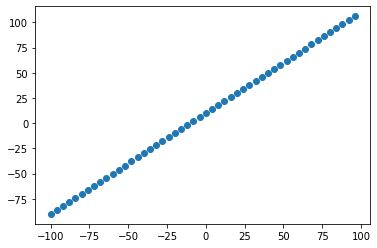

In [23]:
# Visualize the data
plt.scatter(x,y)

###  The Three sets..

* Training set
* validation set
* Test set

In [24]:
# split the data into train and test sets
x_train = x[:40]
y_train = y[:40]
x_test = x[40:]
y_test = y[40:]

In [25]:
# Let' have alook at hoe to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
          
# 2. compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])
# 3. Fit the model
model.fit(x_train,y_train)

2/2 [==============================] - 0s 2ms/step - loss: 10.5273 - mae: 10.5273


### Visualize the model

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
# let's create a model which automatically by defining the input shape argument in the first layer
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential(name= "model_1")
model.add(tf.keras.layers.Dense(10, input_shape = [1], name="input_layer")) # Define the no. of inputs you have
model.add(tf.keras.layers.Dense(1, name="output_layers"))

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics =["mae"])



In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 10)                20        
_________________________________________________________________
output_layers (Dense)        (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Dense layer is the Fully Connected layer

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) th model can update as it trains.
* Non-trainable params - there parameters aren't updated during training(this is typical when you bring in already learn patterns or parameters from other model during **transfer learning**) )

In [29]:
# Let's first our model to the training data 
model.fit(x_train, y_train, epochs = 100, verbose= 0)

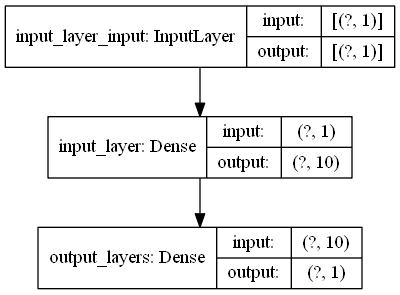

In [30]:
from tensorflow.keras.utils import plot_model
plot_model(model= model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predicitons)

In [31]:
# Make some predicitons 
y_preds = model.predict(x_test)
y_preds

array([[ 70.552185],
       [ 75.13991 ],
       [ 79.72764 ],
       [ 84.315346],
       [ 88.90308 ],
       [ 93.49081 ],
       [ 98.07852 ],
       [102.666245],
       [107.253975],
       [111.84169 ]], dtype=float32)

In [32]:
#Let's create a plotting function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = y_preds):
    """
    plots training data, test data and compares predictions to ground truthlabels.
    """

    plt.figure(figsize = (10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label ='Training data')
    #plot testing data in green
    plt.scatter(test_data, test_labels, c='g' , label ='Testing data')
    #plot model's predictions in red
    plt.scatter(test_data, predictions, c= 'r', label='Predictons')
    #show the legend
    plt.legend();


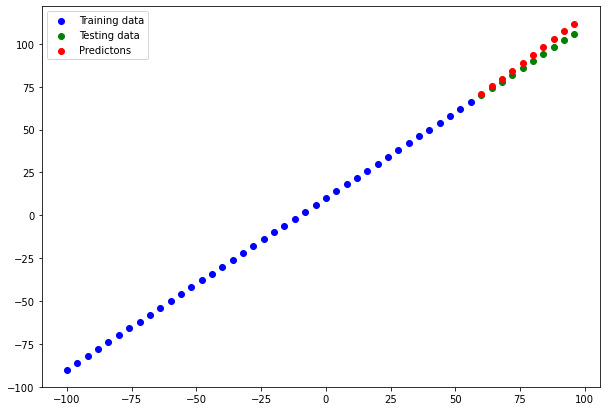

In [33]:
plot_predictions()

###  Evalutaing our model's predictions with regression evaluation metrics

Depending on the model you're woring on, there will be different evalutation metrics to evaluate your model's predictions

Since we are working on regression, two of the main metrics:
* MAE- mean absoloute error, "on average, how wrong is each of my model's predictions" - should use when larger errors are more significant than smaller error
* MSE - mean square error, "square the average errors"

In [34]:
# Evaluate the model on test set
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 0s/step - loss: 3.1969 - mae: 3.1969


[3.196941375732422, 3.196941375732422]

In [35]:
tf.squeeze(y_preds)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.552185,  75.13991 ,  79.72764 ,  84.315346,  88.90308 ,
        93.49081 ,  98.07852 , 102.666245, 107.253975, 111.84169 ],
      dtype=float32)>

In [36]:
# Create the mean absoloute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>

In [37]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))

In [38]:
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>

### Running experiments to improve our model


1. Get more data - get more examples for your model to train on(more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - Give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `mdoel_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build** `model_1`

In [39]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential()
model_1.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ['mae'])

# 3. Fit the model
model_1.fit(x_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 516us/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 469us/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 1ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 994us/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 984us/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 996us/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 997us/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 516us/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 1ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0

2/2 [==============================] - 0s 998us/step - loss: 9.2433 - mae: 9.2433
Epoch 87/100
2/2 [==============================] - 0s 515us/step - loss: 12.0209 - mae: 12.0209
Epoch 88/100
2/2 [==============================] - 0s 499us/step - loss: 10.6389 - mae: 10.6389
Epoch 89/100
2/2 [==============================] - 0s 979us/step - loss: 7.2667 - mae: 7.2667
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 12.7786 - mae: 12.7786
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 7.3481 - mae: 7.3481
Epoch 92/100
2/2 [==============================] - 0s 998us/step - loss: 7.7175 - mae: 7.7175
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 7.1263 - mae: 7.1263
Epoch 94/100
2/2 [==============================] - 0s 997us/step - loss: 12.6190 - mae: 12.6190
Epoch 95/100
2/2 [==============================] - 0s 998us/step - loss: 10.0912 - mae: 10.0912
Epoch 96/100
2/2 [==============================] - 0s 

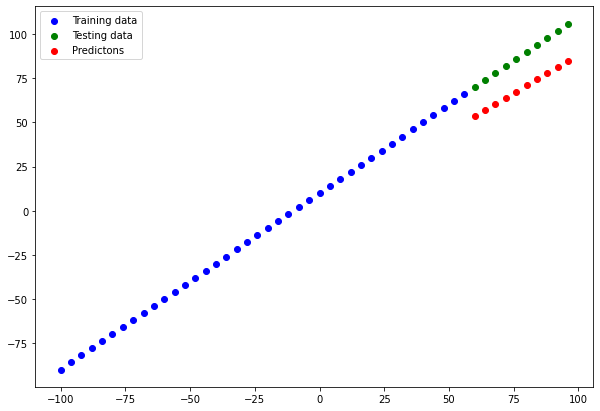

In [40]:
# make and plot some predictions for model_1
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions = y_preds_1)

In [41]:
# calculate model_1 evaluation metrics
mae_1 = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))
mse_1 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds))

In [42]:
mse_1, mae_1

(<tf.Tensor: shape=(), dtype=float32, numpy=13.070127>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.19694>)

**Build** `model_2`

* 2 dense layers, traied for 100 epochs

In [43]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Dense(10))
model_2.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_2.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

#. Fit the model
model_2.fit(x_train, y_train, epochs= 100)

Epoch 1/100
2/2 [==============================] - 0s 979us/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 997us/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 993us/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 998us/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 1ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 998us/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 999us/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 1ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 995us/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 874us/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [=========================

2/2 [==============================] - 0s 525us/step - loss: 15.2862 - mae: 15.2862
Epoch 87/100
2/2 [==============================] - 0s 499us/step - loss: 19.1086 - mae: 19.1086
Epoch 88/100
2/2 [==============================] - 0s 498us/step - loss: 29.8228 - mae: 29.8228
Epoch 89/100
2/2 [==============================] - 0s 978us/step - loss: 10.1742 - mae: 10.1742
Epoch 90/100
2/2 [==============================] - 0s 998us/step - loss: 21.5240 - mae: 21.5240
Epoch 91/100
2/2 [==============================] - 0s 1ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/100
2/2 [==============================] - 0s 499us/step - loss: 18.3977 - mae: 18.3977
Epoch 93/100
2/2 [==============================] - 0s 997us/step - loss: 7.4138 - mae: 7.4138
Epoch 94/100
2/2 [==============================] - 0s 986us/step - loss: 17.7380 - mae: 17.7380
Epoch 95/100
2/2 [==============================] - 0s 997us/step - loss: 11.1144 - mae: 11.1144
Epoch 96/100
2/2 [=============================

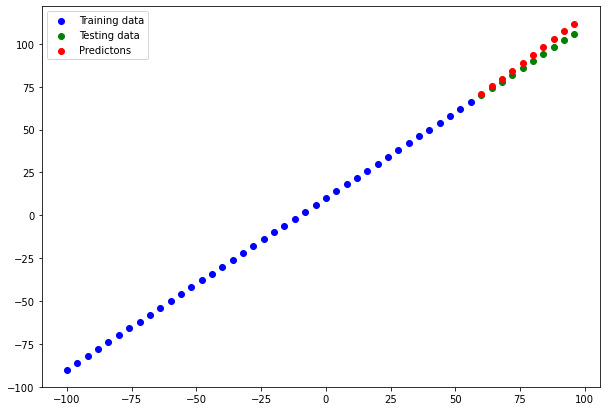

In [44]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [45]:
# Calculate model_2 evaluation metrics
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**Build `model_3`**

* 2 layers, trained for 500 epochs 

In [53]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Dense(10))
model_3.add(tf.keras.layers.Dense(1))

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ['mae'])

#. Fit the model
model_3.fit(x_train, y_train, epochs= 500)

Epoch 1/500
2/2 [==============================] - 0s 1ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 499us/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 998us/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 499us/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 996us/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 2ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 997us/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================]

2/2 [==============================] - 0s 997us/step - loss: 17.4218 - mae: 17.4218
Epoch 84/500
2/2 [==============================] - 0s 1ms/step - loss: 7.2629 - mae: 7.2629
Epoch 85/500
2/2 [==============================] - 0s 996us/step - loss: 14.9650 - mae: 14.9650
Epoch 86/500
2/2 [==============================] - 0s 998us/step - loss: 15.2862 - mae: 15.2862
Epoch 87/500
2/2 [==============================] - 0s 1ms/step - loss: 19.1086 - mae: 19.1086
Epoch 88/500
2/2 [==============================] - 0s 2ms/step - loss: 29.8228 - mae: 29.8228
Epoch 89/500
2/2 [==============================] - 0s 997us/step - loss: 10.1742 - mae: 10.1742
Epoch 90/500
2/2 [==============================] - 0s 997us/step - loss: 21.5240 - mae: 21.5240
Epoch 91/500
2/2 [==============================] - 0s 1ms/step - loss: 10.5716 - mae: 10.5716
Epoch 92/500
2/2 [==============================] - 0s 1ms/step - loss: 18.3977 - mae: 18.3977
Epoch 93/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 2ms/step - loss: 26.2851 - mae: 26.2851
Epoch 168/500
2/2 [==============================] - 0s 1ms/step - loss: 9.8525 - mae: 9.8525
Epoch 169/500
2/2 [==============================] - 0s 2ms/step - loss: 22.5631 - mae: 22.5631
Epoch 170/500
2/2 [==============================] - 0s 2ms/step - loss: 10.1499 - mae: 10.1499
Epoch 171/500
2/2 [==============================] - 0s 2ms/step - loss: 18.0464 - mae: 18.0464
Epoch 172/500
2/2 [==============================] - 0s 1ms/step - loss: 28.8377 - mae: 28.8377
Epoch 173/500
2/2 [==============================] - 0s 997us/step - loss: 16.5280 - mae: 16.5280
Epoch 174/500
2/2 [==============================] - 0s 2ms/step - loss: 11.2115 - mae: 11.2115
Epoch 175/500
2/2 [==============================] - 0s 2ms/step - loss: 27.5839 - mae: 27.5839
Epoch 176/500
2/2 [==============================] - 0s 1ms/step - loss: 8.2680 - mae: 8.2680
Epoch 177/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 499us/step - loss: 9.3009 - mae: 9.3009
Epoch 252/500
2/2 [==============================] - 0s 498us/step - loss: 36.6568 - mae: 36.6568
Epoch 253/500
2/2 [==============================] - 0s 998us/step - loss: 21.8205 - mae: 21.8205
Epoch 254/500
2/2 [==============================] - 0s 997us/step - loss: 7.2792 - mae: 7.2792
Epoch 255/500
2/2 [==============================] - 0s 991us/step - loss: 24.7126 - mae: 24.7126
Epoch 256/500
2/2 [==============================] - 0s 998us/step - loss: 12.4220 - mae: 12.4220
Epoch 257/500
2/2 [==============================] - 0s 499us/step - loss: 10.5823 - mae: 10.5823
Epoch 258/500
2/2 [==============================] - 0s 498us/step - loss: 14.4883 - mae: 14.4883
Epoch 259/500
2/2 [==============================] - 0s 498us/step - loss: 8.6132 - mae: 8.6132
Epoch 260/500
2/2 [==============================] - 0s 998us/step - loss: 43.0580 - mae: 43.0580
Epoch 261/500
2/2 [=====================

2/2 [==============================] - 0s 515us/step - loss: 12.4833 - mae: 12.4833
Epoch 336/500
2/2 [==============================] - 0s 498us/step - loss: 32.2171 - mae: 32.2171
Epoch 337/500
2/2 [==============================] - 0s 981us/step - loss: 10.4477 - mae: 10.4477
Epoch 338/500
2/2 [==============================] - 0s 498us/step - loss: 19.6832 - mae: 19.6832
Epoch 339/500
2/2 [==============================] - 0s 998us/step - loss: 35.0762 - mae: 35.0762
Epoch 340/500
2/2 [==============================] - 0s 997us/step - loss: 10.4192 - mae: 10.4192
Epoch 341/500
2/2 [==============================] - 0s 498us/step - loss: 9.7625 - mae: 9.7625
Epoch 342/500
2/2 [==============================] - 0s 998us/step - loss: 11.9500 - mae: 11.9500
Epoch 343/500
2/2 [==============================] - 0s 996us/step - loss: 9.3943 - mae: 9.3943
Epoch 344/500
2/2 [==============================] - 0s 998us/step - loss: 5.6071 - mae: 5.6071
Epoch 345/500
2/2 [=====================

2/2 [==============================] - 0s 997us/step - loss: 15.8836 - mae: 15.8836
Epoch 420/500
2/2 [==============================] - 0s 997us/step - loss: 24.7510 - mae: 24.7510
Epoch 421/500
2/2 [==============================] - 0s 499us/step - loss: 17.3753 - mae: 17.3753
Epoch 422/500
2/2 [==============================] - 0s 499us/step - loss: 7.8241 - mae: 7.8241
Epoch 423/500
2/2 [==============================] - 0s 998us/step - loss: 25.3789 - mae: 25.3789
Epoch 424/500
2/2 [==============================] - 0s 497us/step - loss: 15.1031 - mae: 15.1031
Epoch 425/500
2/2 [==============================] - 0s 499us/step - loss: 7.1643 - mae: 7.1643
Epoch 426/500
2/2 [==============================] - 0s 997us/step - loss: 20.3318 - mae: 20.3318
Epoch 427/500
2/2 [==============================] - 0s 996us/step - loss: 6.3283 - mae: 6.3283
Epoch 428/500
2/2 [==============================] - 0s 997us/step - loss: 12.9962 - mae: 12.9962
Epoch 429/500
2/2 [=====================

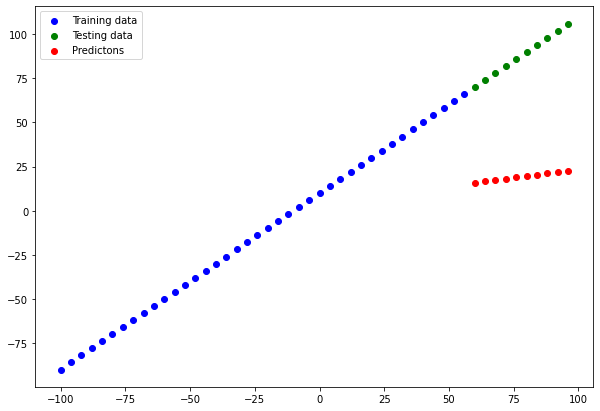

In [58]:
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

In [59]:
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_preds_3))
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_preds_3))

In [60]:
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results of our experiments

we've run a few experiments, let's compare them now

In [65]:
# let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])

In [66]:
all_results

,model,mae,mse
0,model_1,3.196940,13.070127
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


## Tracking your experiments

one really good habit in machine learning modelling is to track the results of your experiments.

and when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tool sto help us!

As you build models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help modelling experiments (we'll see this one later).
* Weihts and baises - a tool for tracking all of kinds of machine learning experiments (plugs straight into TensorBoard).

  ### Saving a Model 
  
  Saving our models allows us to use them outside of Goodlecolab (or wherever they were trained) such as in a web application or a mobile app.
  
 There are two main formats we can save our model's to:
 
* 1. The SavedModel
* 2. The HDF5 format

In [67]:
# Save the model using SaveModel format
model_2.save('Best_model_SavedModel_format')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: Best_model_SavedModel_format\assets


In [68]:
# Save the model using HDF5 format
model_2.save('best_model_HDF5_format.h5')

### Loading the saved model

In [80]:
loaded_SavedModel_format = tf.keras.models.load_model('Best_model_SavedModel_format/')
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [86]:
#Compare the mode_2 predictions with the savedmodel format model predictions

model_2_preds = model_2.predict(x_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(x_test)
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [83]:
model_2_preds, loaded_SavedModel_format_preds

(array([[15.854746],
        [16.617332],
        [17.379921],
        [18.142508],
        [18.905096],
        [19.667683],
        [20.430271],
        [21.192858],
        [21.955446],
        [22.718035]], dtype=float32),
 array([[15.854746],
        [16.617332],
        [17.379921],
        [18.142508],
        [18.905096],
        [19.667683],
        [20.430271],
        [21.192858],
        [21.955446],
        [22.718035]], dtype=float32))

In [87]:
# Load in a model using .h6 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')

In [89]:
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [91]:
# Check to see if loaded if .h5 model predicitons match model_2
model_2_preds = model_2.predict(x_test)
loaded_h5_model_preds =  loaded_h5_model.predict(x_test)
model_2_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [93]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
insurance = pd.read_csv('insurance.csv')

In [97]:
insurance['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [98]:
insurance.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [100]:
# Let's try one hot encode our dataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [103]:
# Create X and Y values( features and labels)
x = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [104]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size= 0.8, random_state = 42)

In [107]:
tf.random.set_seed(42)

# Build a neural network (sort of like model_2 above)
insurance_model= tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# 2.Complile the model

insurance_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.SGD(),
                       metrics =['mae'])

#. Fit the model
insurance_model.fit(x_train, y_train, epochs= 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 443us/step - loss: 11759.7080 - mae: 11759.7080
Epoch 2/100
9/9 [==============================] - 0s 332us/step - loss: 8002.1743 - mae: 8002.1743
Epoch 3/100
9/9 [==============================] - 0s 443us/step - loss: 7600.6602 - mae: 7600.6602
Epoch 4/100
9/9 [==============================] - 0s 554us/step - loss: 7541.0542 - mae: 7541.0542
Epoch 5/100
9/9 [==============================] - 0s 554us/step - loss: 7792.7441 - mae: 7792.7441
Epoch 

9/9 [==============================] - 0s 443us/step - loss: 7908.6978 - mae: 7908.6978
Epoch 76/100
9/9 [==============================] - 0s 443us/step - loss: 7414.8906 - mae: 7414.8906
Epoch 77/100
9/9 [==============================] - 0s 442us/step - loss: 7752.5244 - mae: 7752.5244
Epoch 78/100
9/9 [==============================] - 0s 332us/step - loss: 7908.0049 - mae: 7908.0049
Epoch 79/100
9/9 [==============================] - 0s 554us/step - loss: 7749.6973 - mae: 7749.6973
Epoch 80/100
9/9 [==============================] - 0s 554us/step - loss: 7954.5684 - mae: 7954.5684
Epoch 81/100
9/9 [==============================] - 0s 554us/step - loss: 7606.8291 - mae: 7606.8291
Epoch 82/100
9/9 [==============================] - 0s 443us/step - loss: 7940.2583 - mae: 7940.2583
Epoch 83/100
9/9 [==============================] - 0s 333us/step - loss: 7643.9463 - mae: 7643.9463
Epoch 84/100
9/9 [==============================] - 0s 444us/step - loss: 7520.8652 - mae: 7520.8652
Epo

In [108]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

34/34 [==============================] - 0s 344us/step - loss: 6908.8809 - mae: 6908.8809


[6908.880859375, 6908.880859375]

In [110]:
y_train.median()

9566.9909

Right now it looks like our model isn't performing too well... let's try and improve it

To try improve our model,we'll run 2 experiments:
* 1. Add an extra layer with more hidden units and use the Adam optimizer
* 2. Train for longer
* 3. (insert your own experiment here)

In [119]:
# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dense(10))
insurance_model_2.add(tf.keras.layers.Dense(1))

# Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ['mae'])

# Fit the model
insurance_model_2.fit(x_train,y_train, epochs= 100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 554us/step - loss: 13417.4775 - mae: 13417.4775
Epoch 2/100
9/9 [==============================] - 0s 380us/step - loss: 13388.8506 - mae: 13388.8506
Epoch 3/100
9/9 [==============================] - 0s 554us/step - loss: 13357.2842 - mae: 13357.2842
Epoch 4/100
9/9 [==============================] - 0s 886us/step - loss: 13320.3750 - mae: 13320.3750
Epoch 5/100
9/9 [==============================] - 0s 443us/step - loss: 13276.5791 - mae: 13276.579

9/9 [==============================] - 0s 435us/step - loss: 7297.0117 - mae: 7297.0117
Epoch 75/100
9/9 [==============================] - 0s 446us/step - loss: 7289.4634 - mae: 7289.4634
Epoch 76/100
9/9 [==============================] - 0s 562us/step - loss: 7283.2749 - mae: 7283.2749
Epoch 77/100
9/9 [==============================] - 0s 721us/step - loss: 7279.5420 - mae: 7279.5420
Epoch 78/100
9/9 [==============================] - 0s 529us/step - loss: 7271.4438 - mae: 7271.4438
Epoch 79/100
9/9 [==============================] - 0s 554us/step - loss: 7264.2051 - mae: 7264.2051
Epoch 80/100
9/9 [==============================] - 0s 837us/step - loss: 7256.9546 - mae: 7256.9546
Epoch 81/100
9/9 [==============================] - 0s 997us/step - loss: 7250.9600 - mae: 7250.9600
Epoch 82/100
9/9 [==============================] - 0s 776us/step - loss: 7243.9258 - mae: 7243.9258
Epoch 83/100
9/9 [==============================] - 0s 2ms/step - loss: 7237.3462 - mae: 7237.3462
Epoch

In [120]:
# Evaluate the model
insurance_model_2.evaluate(x_test, y_test)

34/34 [==============================] - 0s 399us/step - loss: 7012.1650 - mae: 7012.1650


[7012.1650390625, 7012.1650390625]

In [132]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics =['mae'])
# 3. Fit the model
history = insurance_model_3.fit(x_train,y_train, epochs =500)

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

9/9 [==============================] - 0s 598us/step - loss: 13417.4775 - mae: 13417.4775
Epoch 2/500
9/9 [==============================] - 0s 391us/step - loss: 13388.8506 - mae: 13388.8506
Epoch 3/500
9/9 [==============================] - 0s 443us/step - loss: 13357.2842 - mae: 13357.2842
Epoch 4/500
9/9 [==============================] - 0s 609us/step - loss: 13320.3750 - mae: 13320.3750
Epoch 5/500
9/9 [==============================] - 0s 542us/step - loss: 13276.5791 - mae: 13276.579

9/9 [==============================] - 0s 666us/step - loss: 7297.0117 - mae: 7297.0117
Epoch 75/500
9/9 [==============================] - 0s 516us/step - loss: 7289.4634 - mae: 7289.4634
Epoch 76/500
9/9 [==============================] - 0s 520us/step - loss: 7283.2749 - mae: 7283.2749
Epoch 77/500
9/9 [==============================] - 0s 554us/step - loss: 7279.5420 - mae: 7279.5420
Epoch 78/500
9/9 [==============================] - 0s 554us/step - loss: 7271.4438 - mae: 7271.4438
Epoch 79/500
9/9 [==============================] - 0s 390us/step - loss: 7264.2051 - mae: 7264.2051
Epoch 80/500
9/9 [==============================] - 0s 554us/step - loss: 7256.9546 - mae: 7256.9546
Epoch 81/500
9/9 [==============================] - 0s 665us/step - loss: 7250.9600 - mae: 7250.9600
Epoch 82/500
9/9 [==============================] - 0s 553us/step - loss: 7243.9258 - mae: 7243.9258
Epoch 83/500
9/9 [==============================] - 0s 429us/step - loss: 7237.3462 - mae: 7237.3462
Epo

9/9 [==============================] - 0s 444us/step - loss: 6730.5620 - mae: 6730.5620
Epoch 155/500
9/9 [==============================] - 0s 443us/step - loss: 6722.7217 - mae: 6722.7217
Epoch 156/500
9/9 [==============================] - 0s 554us/step - loss: 6712.8364 - mae: 6712.8364
Epoch 157/500
9/9 [==============================] - 0s 382us/step - loss: 6707.5693 - mae: 6707.5693
Epoch 158/500
9/9 [==============================] - 0s 443us/step - loss: 6698.8237 - mae: 6698.8237
Epoch 159/500
9/9 [==============================] - 0s 586us/step - loss: 6690.9062 - mae: 6690.9062
Epoch 160/500
9/9 [==============================] - 0s 528us/step - loss: 6687.0757 - mae: 6687.0757
Epoch 161/500
9/9 [==============================] - 0s 443us/step - loss: 6677.1460 - mae: 6677.1460
Epoch 162/500
9/9 [==============================] - 0s 520us/step - loss: 6668.8208 - mae: 6668.8208
Epoch 163/500
9/9 [==============================] - 0s 530us/step - loss: 6661.0991 - mae: 6661

9/9 [==============================] - 0s 443us/step - loss: 6340.9072 - mae: 6340.9072
Epoch 235/500
9/9 [==============================] - 0s 388us/step - loss: 6332.7002 - mae: 6332.7002
Epoch 236/500
9/9 [==============================] - 0s 443us/step - loss: 6328.3989 - mae: 6328.3989
Epoch 237/500
9/9 [==============================] - 0s 396us/step - loss: 6324.1411 - mae: 6324.1411
Epoch 238/500
9/9 [==============================] - 0s 443us/step - loss: 6325.3955 - mae: 6325.3955
Epoch 239/500
9/9 [==============================] - 0s 535us/step - loss: 6316.8389 - mae: 6316.8394
Epoch 240/500
9/9 [==============================] - 0s 546us/step - loss: 6313.4419 - mae: 6313.4419
Epoch 241/500
9/9 [==============================] - 0s 554us/step - loss: 6307.4878 - mae: 6307.4878
Epoch 242/500
9/9 [==============================] - 0s 537us/step - loss: 6303.6855 - mae: 6303.6855
Epoch 243/500
9/9 [==============================] - 0s 413us/step - loss: 6299.0225 - mae: 6299

9/9 [==============================] - 0s 443us/step - loss: 5882.2930 - mae: 5882.2930
Epoch 315/500
9/9 [==============================] - 0s 532us/step - loss: 5877.2910 - mae: 5877.2910
Epoch 316/500
9/9 [==============================] - 0s 443us/step - loss: 5864.2935 - mae: 5864.2935
Epoch 317/500
9/9 [==============================] - 0s 443us/step - loss: 5862.1729 - mae: 5862.1729
Epoch 318/500
9/9 [==============================] - 0s 503us/step - loss: 5853.9546 - mae: 5853.9546
Epoch 319/500
9/9 [==============================] - 0s 443us/step - loss: 5841.7266 - mae: 5841.7266
Epoch 320/500
9/9 [==============================] - 0s 570us/step - loss: 5831.5034 - mae: 5831.5034
Epoch 321/500
9/9 [==============================] - 0s 554us/step - loss: 5826.7559 - mae: 5826.7559
Epoch 322/500
9/9 [==============================] - 0s 443us/step - loss: 5815.2075 - mae: 5815.2075
Epoch 323/500
9/9 [==============================] - 0s 443us/step - loss: 5807.3447 - mae: 5807

9/9 [==============================] - 0s 443us/step - loss: 4943.6763 - mae: 4943.6763
Epoch 395/500
9/9 [==============================] - 0s 443us/step - loss: 4937.3159 - mae: 4937.3159
Epoch 396/500
9/9 [==============================] - 0s 400us/step - loss: 4906.9351 - mae: 4906.9351
Epoch 397/500
9/9 [==============================] - 0s 443us/step - loss: 4891.1553 - mae: 4891.1553
Epoch 398/500
9/9 [==============================] - 0s 333us/step - loss: 4869.5806 - mae: 4869.5806
Epoch 399/500
9/9 [==============================] - 0s 443us/step - loss: 4855.8809 - mae: 4855.8809
Epoch 400/500
9/9 [==============================] - 0s 443us/step - loss: 4828.3511 - mae: 4828.3511
Epoch 401/500
9/9 [==============================] - 0s 443us/step - loss: 4817.2539 - mae: 4817.2539
Epoch 402/500
9/9 [==============================] - 0s 537us/step - loss: 4797.4321 - mae: 4797.4321
Epoch 403/500
9/9 [==============================] - 0s 554us/step - loss: 4775.7417 - mae: 4775

9/9 [==============================] - 0s 443us/step - loss: 3880.4358 - mae: 3880.4358
Epoch 475/500
9/9 [==============================] - 0s 443us/step - loss: 3883.1958 - mae: 3883.1958
Epoch 476/500
9/9 [==============================] - 0s 443us/step - loss: 3889.6504 - mae: 3889.6504
Epoch 477/500
9/9 [==============================] - 0s 443us/step - loss: 3870.9722 - mae: 3870.9722
Epoch 478/500
9/9 [==============================] - 0s 479us/step - loss: 3878.7385 - mae: 3878.7385
Epoch 479/500
9/9 [==============================] - 0s 443us/step - loss: 3864.1011 - mae: 3864.1011
Epoch 480/500
9/9 [==============================] - 0s 504us/step - loss: 3877.4919 - mae: 3877.4919
Epoch 481/500
9/9 [==============================] - 0s 554us/step - loss: 3876.9395 - mae: 3876.9395
Epoch 482/500
9/9 [==============================] - 0s 443us/step - loss: 3875.1519 - mae: 3875.1519
Epoch 483/500
9/9 [==============================] - 0s 522us/step - loss: 3858.4150 - mae: 3858

In [127]:
# Evaluate our third model
insurance_model_3.evaluate(x_test, y_test)

34/34 [==============================] - 0s 355us/step - loss: 3802.4360 - mae: 3802.4360


[3802.43603515625, 3802.43603515625]

Text(0, 0.5, 'epochs')

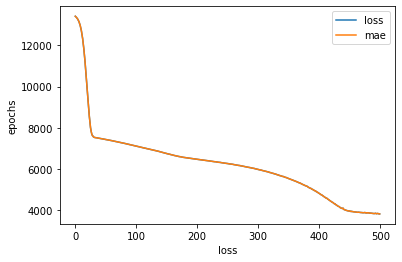

In [133]:
# plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.xlabel('loss')
plt.ylabel('epochs')

* How long should you train for ?
it depends, however, EarlyStopping Callback which TensorFlow component you can add to your model to stop when it stop improving after a certain metric.

## Preprocessing data(normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure which to use, you could try both and decide which to use.

In [142]:
# Read the insurance DataFrame
insurance = pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:ylabel='Frequency'>

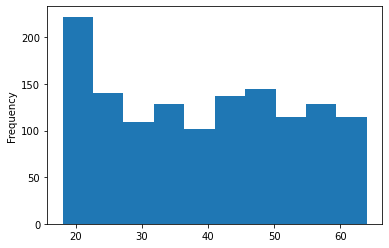

In [136]:
x['age'].plot(kind = "hist")

<AxesSubplot:ylabel='Frequency'>

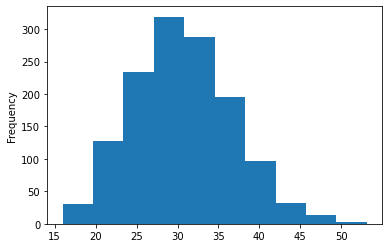

In [138]:
x['bmi'].plot(kind= "hist")

In [139]:
x['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [145]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a coloumn transformer
ct = make_column_transformer(
     (MinMaxScaler(), ["age", "bmi", "children"]), # Turn all values in these coloumns between 0 and 1
     (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"]))

# Create x & y
x = insurance.drop("charges", axis = 1)
y = insurance["charges"] 

# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.8, random_state=42)

# Fit the coloumn transformer to our training data
ct.fit(x_train)

# Transfrom training and test data with momalization (MinMaxSclaer) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test) 

In [147]:
# What does our data looks like
x_train_normal[0]

array([0.7826087 , 0.49001137, 0.2       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

# Build a neural network model to fit on our normalized data

In [152]:
 tf.random.set_seed(42)
    
# 1. Create the model
insurance_model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ['mae'])

# Fit the model
insurance_model_4.fit(x_train_normal, y_train, epochs = 500)

Epoch 1/500
9/9 [==============================] - 0s 651us/step - loss: 13109.7461 - mae: 13109.7461
Epoch 2/500
9/9 [==============================] - 0s 443us/step - loss: 13108.4150 - mae: 13108.4150
Epoch 3/500
9/9 [==============================] - 0s 432us/step - loss: 13106.8613 - mae: 13106.8613
Epoch 4/500
9/9 [==============================] - 0s 443us/step - loss: 13104.9609 - mae: 13104.9609
Epoch 5/500
9/9 [==============================] - 0s 552us/step - loss: 13102.5791 - mae: 13102.5791
Epoch 6/500
9/9 [==============================] - 0s 370us/step - loss: 13099.5586 - mae: 13099.5586
Epoch 7/500
9/9 [==============================] - 0s 554us/step - loss: 13095.7412 - mae: 13095.7412
Epoch 8/500
9/9 [==============================] - 0s 443us/step - loss: 13090.9189 - mae: 13090.9189
Epoch 9/500
9/9 [==============================] - 0s 443us/step - loss: 13084.9268 - mae: 13084.9268
Epoch 10/500
9/9 [==============================] - 0s 442us/step - loss: 13077.53

9/9 [==============================] - 0s 620us/step - loss: 8084.5664 - mae: 8084.5664
Epoch 79/500
9/9 [==============================] - 0s 443us/step - loss: 8060.2090 - mae: 8060.2090
Epoch 80/500
9/9 [==============================] - 0s 554us/step - loss: 8043.7573 - mae: 8043.7573
Epoch 81/500
9/9 [==============================] - 0s 554us/step - loss: 8024.8735 - mae: 8024.8735
Epoch 82/500
9/9 [==============================] - 0s 665us/step - loss: 8010.9512 - mae: 8010.9512
Epoch 83/500
9/9 [==============================] - 0s 773us/step - loss: 7995.7754 - mae: 7995.7754
Epoch 84/500
9/9 [==============================] - 0s 662us/step - loss: 7979.4307 - mae: 7979.4307
Epoch 85/500
9/9 [==============================] - 0s 665us/step - loss: 7964.8828 - mae: 7964.8828
Epoch 86/500
9/9 [==============================] - 0s 566us/step - loss: 7949.7305 - mae: 7949.7305
Epoch 87/500
9/9 [==============================] - 0s 397us/step - loss: 7935.4355 - mae: 7935.4355
Epo

9/9 [==============================] - 0s 522us/step - loss: 6964.5962 - mae: 6964.5962
Epoch 159/500
9/9 [==============================] - 0s 819us/step - loss: 6947.5449 - mae: 6947.5449
Epoch 160/500
9/9 [==============================] - 0s 665us/step - loss: 6930.3638 - mae: 6930.3638
Epoch 161/500
9/9 [==============================] - 0s 664us/step - loss: 6913.4946 - mae: 6913.4946
Epoch 162/500
9/9 [==============================] - 0s 776us/step - loss: 6895.0674 - mae: 6895.0674
Epoch 163/500
9/9 [==============================] - 0s 443us/step - loss: 6876.5596 - mae: 6876.5596
Epoch 164/500
9/9 [==============================] - 0s 554us/step - loss: 6857.8467 - mae: 6857.8467
Epoch 165/500
9/9 [==============================] - 0s 555us/step - loss: 6838.9922 - mae: 6838.9922
Epoch 166/500
9/9 [==============================] - 0s 554us/step - loss: 6821.0522 - mae: 6821.0522
Epoch 167/500
9/9 [==============================] - 0s 613us/step - loss: 6801.5425 - mae: 6801

9/9 [==============================] - 0s 443us/step - loss: 4765.7876 - mae: 4765.7876
Epoch 239/500
9/9 [==============================] - 0s 443us/step - loss: 4732.0796 - mae: 4732.0796
Epoch 240/500
9/9 [==============================] - 0s 443us/step - loss: 4699.3921 - mae: 4699.3921
Epoch 241/500
9/9 [==============================] - 0s 618us/step - loss: 4664.3291 - mae: 4664.3291
Epoch 242/500
9/9 [==============================] - 0s 443us/step - loss: 4630.5635 - mae: 4630.5635
Epoch 243/500
9/9 [==============================] - 0s 538us/step - loss: 4596.7261 - mae: 4596.7261
Epoch 244/500
9/9 [==============================] - 0s 443us/step - loss: 4562.0918 - mae: 4562.0918
Epoch 245/500
9/9 [==============================] - 0s 554us/step - loss: 4526.4751 - mae: 4526.4751
Epoch 246/500
9/9 [==============================] - 0s 555us/step - loss: 4492.9927 - mae: 4492.9927
Epoch 247/500
9/9 [==============================] - 0s 443us/step - loss: 4462.0835 - mae: 4462

9/9 [==============================] - 0s 471us/step - loss: 3658.3054 - mae: 3658.3054
Epoch 319/500
9/9 [==============================] - 0s 443us/step - loss: 3657.3970 - mae: 3657.3970
Epoch 320/500
9/9 [==============================] - 0s 442us/step - loss: 3655.3442 - mae: 3655.3442
Epoch 321/500
9/9 [==============================] - 0s 443us/step - loss: 3655.4094 - mae: 3655.4094
Epoch 322/500
9/9 [==============================] - 0s 443us/step - loss: 3655.2642 - mae: 3655.2642
Epoch 323/500
9/9 [==============================] - 0s 502us/step - loss: 3653.2415 - mae: 3653.2415
Epoch 324/500
9/9 [==============================] - 0s 443us/step - loss: 3653.0635 - mae: 3653.0635
Epoch 325/500
9/9 [==============================] - 0s 421us/step - loss: 3651.2405 - mae: 3651.2405
Epoch 326/500
9/9 [==============================] - 0s 397us/step - loss: 3650.9331 - mae: 3650.9331
Epoch 327/500
9/9 [==============================] - 0s 443us/step - loss: 3649.1904 - mae: 3649

9/9 [==============================] - 0s 443us/step - loss: 3568.0710 - mae: 3568.0710
Epoch 399/500
9/9 [==============================] - 0s 443us/step - loss: 3568.2097 - mae: 3568.2097
Epoch 400/500
9/9 [==============================] - 0s 443us/step - loss: 3565.8174 - mae: 3565.8174
Epoch 401/500
9/9 [==============================] - 0s 506us/step - loss: 3566.0132 - mae: 3566.0132
Epoch 402/500
9/9 [==============================] - 0s 529us/step - loss: 3564.1672 - mae: 3564.1672
Epoch 403/500
9/9 [==============================] - 0s 443us/step - loss: 3561.6123 - mae: 3561.6123
Epoch 404/500
9/9 [==============================] - 0s 554us/step - loss: 3560.6521 - mae: 3560.6521
Epoch 405/500
9/9 [==============================] - 0s 443us/step - loss: 3559.3931 - mae: 3559.3931
Epoch 406/500
9/9 [==============================] - 0s 443us/step - loss: 3557.9478 - mae: 3557.9478
Epoch 407/500
9/9 [==============================] - 0s 443us/step - loss: 3556.5388 - mae: 3556

9/9 [==============================] - 0s 431us/step - loss: 3479.4949 - mae: 3479.4949
Epoch 479/500
9/9 [==============================] - 0s 421us/step - loss: 3478.0486 - mae: 3478.0486
Epoch 480/500
9/9 [==============================] - 0s 332us/step - loss: 3477.2644 - mae: 3477.2644
Epoch 481/500
9/9 [==============================] - 0s 443us/step - loss: 3477.4368 - mae: 3477.4368
Epoch 482/500
9/9 [==============================] - 0s 443us/step - loss: 3477.1431 - mae: 3477.1431
Epoch 483/500
9/9 [==============================] - 0s 398us/step - loss: 3475.1987 - mae: 3475.1987
Epoch 484/500
9/9 [==============================] - 0s 504us/step - loss: 3474.7773 - mae: 3474.7773
Epoch 485/500
9/9 [==============================] - 0s 443us/step - loss: 3474.4019 - mae: 3474.4019
Epoch 486/500
9/9 [==============================] - 0s 416us/step - loss: 3474.0857 - mae: 3474.0857
Epoch 487/500
9/9 [==============================] - 0s 443us/step - loss: 3472.1611 - mae: 3472

In [153]:
# Evaluate the model
insurance_model_4.evaluate(x_test_normal, y_test)

34/34 [==============================] - 0s 323us/step - loss: 3480.9514 - mae: 3480.9514


[3480.951416015625, 3480.951416015625]